In [14]:
from imports import *

In [12]:
%reload_ext autoreload

# Image creation

In [15]:
# Load the matrices from CSV files into separate variables
file_names = ["v1202_pematrix_noTPCselection", "v1202_timematrix_noTPCselection_c1_10ophits", "vis_map_realistic", "vuv_map_realistic", "coated_pmt_map_realistic", "uncoated_pmt_map_realistic" ,"xarap_vis_map_realistic" , "xarap_vuv_map_realistic", "vis_map_compressed", "vuv_map_compressed", "coated_pmt_map_compressed", "uncoated_pmt_map_compressed", "xarap_vis_map_compressed", "xarap_vuv_map_compressed"]

for i, name in enumerate(file_names):
    if i < 2:  # The first two files as float
        locals()[name] = np.loadtxt(f"saved_archives/pe_matrix_&_time_matrix/{name}.csv", delimiter=",")
    elif 2 <= i < 8:  # The next two files as int
        locals()[name] = np.loadtxt(f"saved_archives/maps/realistic/{name}.csv", delimiter=",", dtype=int)
    else:  # The remaining files as int
        locals()[name] = np.loadtxt(f"saved_archives/maps/compressed/{name}.csv", delimiter=",", dtype=int)

# 4-component map creation

**Tarda 1 min. aprox** Se crean mapas solo con pmts, xas y con las 4 componentes (4-comp). En este caso con la corrección de ToF únicamente.

In [6]:
image_realistic_4comp = image_creator_gen(v1202_pematrix_noTPCselection, v1202_timematrix_noTPCselection_c1_10ophits, coated_pmt_map_realistic, uncoated_pmt_map_realistic, xarap_vis_map_realistic, xarap_vuv_map_realistic)
print('Number of events, image height, width, layers:', np.shape(image_realistic_4comp))

Number of events, image height, width, layers: (21964, 59, 70, 16)


In [8]:
np.save("/data/vidales/images/v1202_noTPCselection_gen1.npy", image_realistic_4comp)

In [3]:
pe_image_realistic_4comp, time_image_realistic_4comp = image_creator_gen2(pe_matrix_v0302, time_matrix_50_v0302, coated_pmt_map_realistic, uncoated_pmt_map_realistic, xarap_vis_map_realistic, xarap_vuv_map_realistic)
print('Number of events, image height, width, layers:', np.shape(pe_image_realistic_4comp))

Number of events, image height, width, layers: (21796, 59, 70, 8)


In [5]:
np.save("/data/vidales/images/pe_image_realistic_4comp_v0402_sin_inv.npy", pe_image_realistic_4comp)
np.save("/data/vidales/images/time_image_realistic_4comp_v0402.npy_sin_inv", time_image_realistic_4comp)

### Alberto image generation

In [2]:
# Load the matrices from CSV files into separate variables
file_names = ["pe_matrix_corrected", "time_matrix_corrected", "alberto_vis_map", "alberto_vuv_map"]

for i, name in enumerate(file_names):
    if i < 2:  # The first two files as float
        locals()[name] = np.loadtxt(f"saved_archives/pe_matrix_&_time_matrix/{name}.csv", delimiter=",")
    else:  # The next two files as int
        locals()[name] = np.loadtxt(f"saved_archives/maps/Alberto_maps/{name}.csv", delimiter=",", dtype=int)

In [3]:
alberto_image_corrected = alberto_image(pe_matrix_corrected, time_matrix_corrected, alberto_vis_map, alberto_vuv_map)

In [4]:
np.save("/data/vidales/images/alberto_image_corrected.npy", alberto_image_corrected)

# Visualization of generated images

## 4-component visualization

**load data**

In [3]:
image_realistic_4comp = np.load("/data/vidales/images/image_realistic_4comp_c_1_first10_2101.npy")

In [5]:
image_realistic_4comp_2 = np.concatenate((pe_image_realistic_4comp, time_image_realistic_4comp), axis=-1)
print('Number of events, image height, width, layers:', np.shape(image_realistic_4comp_2))

Number of events, image height, width, layers: (21796, 59, 70, 16)


**Para 4 componentes**

In [9]:
labels_4comp = [
        "PE1: Coated PMT/Volume -", "PE2: Coated PMT/Volume +", "PE1: Uncoated PMT/Volume -", "PE2: Uncoated PMT/Volume +",
        "PE1: XA VIS/Volume -", "PE2: XA VIS/Volume +", "PE1: XA VUV/Volume -", "PE2: XA VUV/Volume +",
        "T1: Coated PMT/Volume -", "T2: Coated PMT/Volume +", "T1: Uncoated PMT/Volume -", "T2: Uncoated PMT/Volume +", 
        "T1: XA VIS/Volume -", "T2: XA VIS/Volume +", "T1: XA VUV/Volume -", "T2: XA VUV/Volume +"   
    ]
    
groups_4comp = [
        [0, 1, 4, 5],    # First group
        [2, 3, 6, 7],    # Second group
        [8, 9, 12, 13],  # Third group
        [10, 11, 14, 15] # Fourth group
    ]

grid_4comp =(4,4)
event_idx=1489

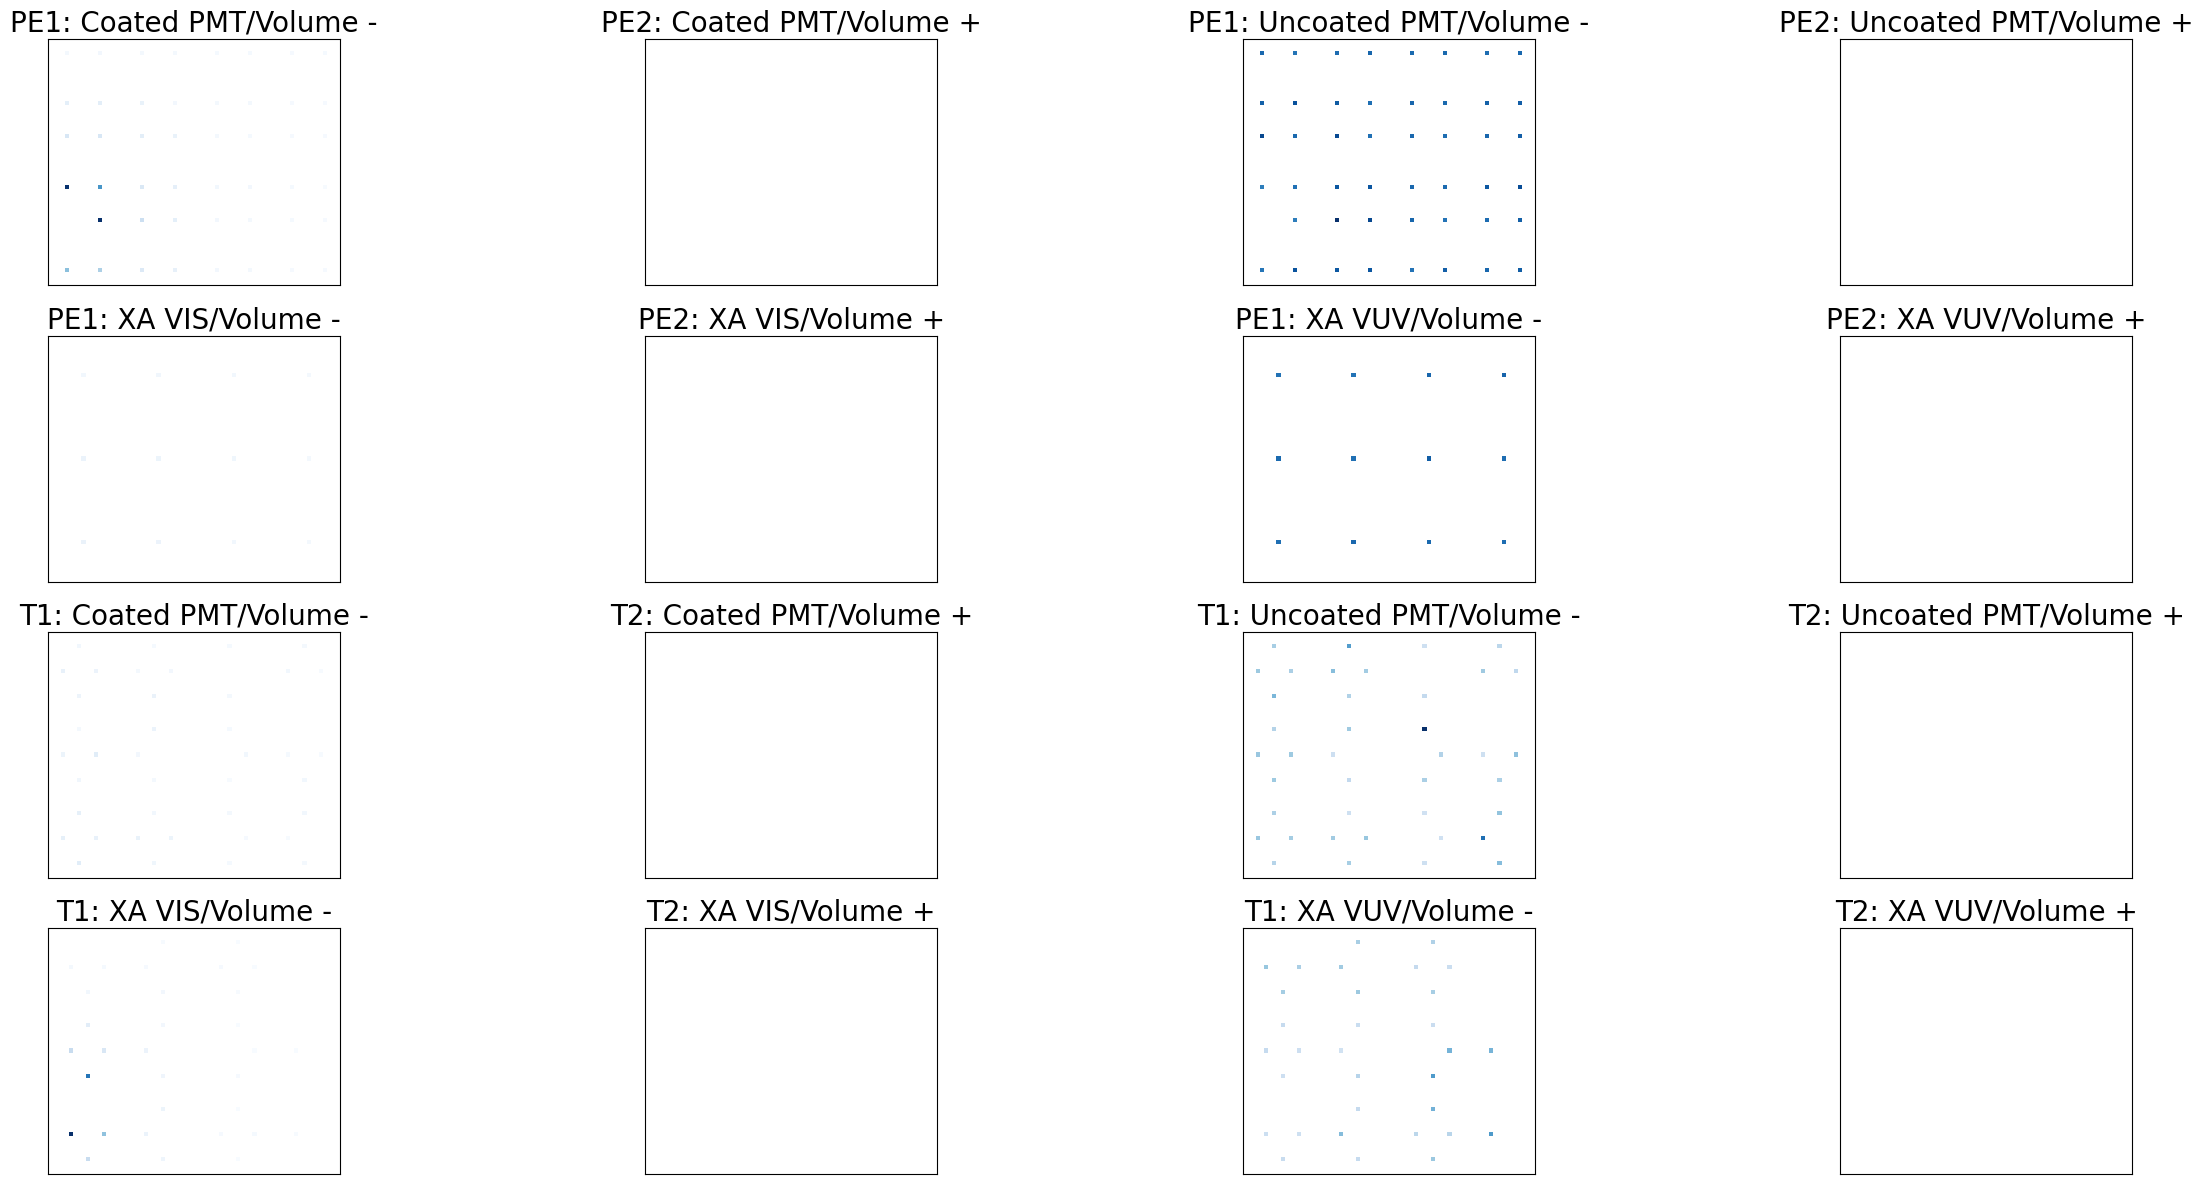

In [11]:
plot_image(image_realistic_4comp, event_idx, labels_4comp, groups_4comp, grid_4comp, figsize=(26, 12))

**Para 2 componentes**

In [81]:
labels_pmts = [
        "PE1: Coated PMT", "PE2: Uncoated PMT", "PE3: XAs VIS", "PE4: XAs VUV",
        "T1: Coated PMT", "T2: Uncoated PMT","T1: XAs VIS", "T2: XAs VUV"
    ]
    
groups_pmts = [
        [0, 1], [2, 3],    # First group
        [4, 5], [6, 7]   # Second group
    ]

grid_pmts =(2,4)
event_idx=1497

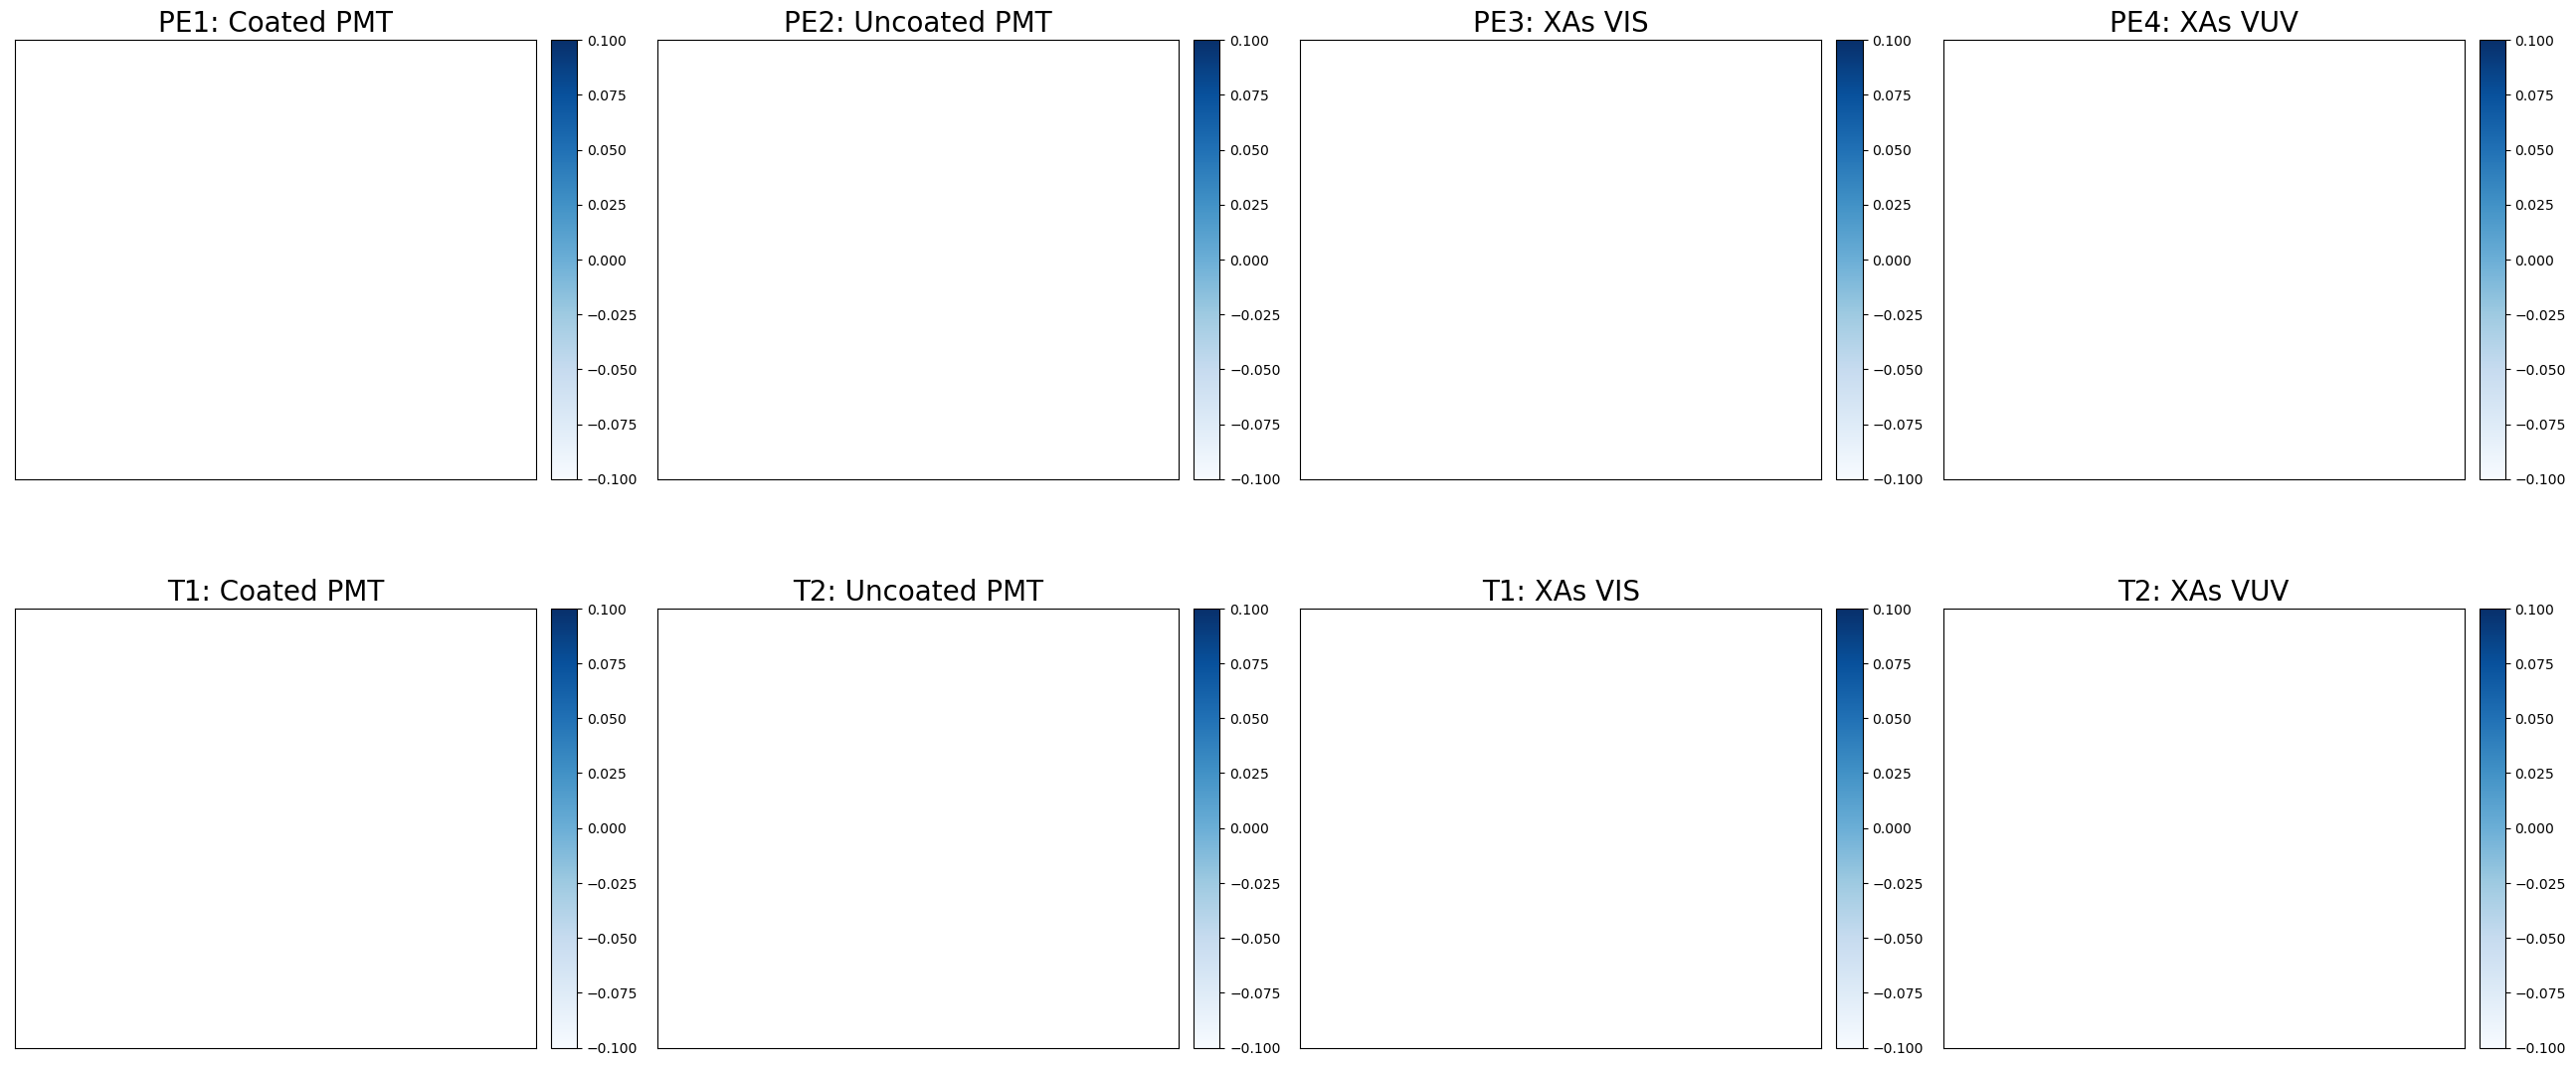

In [82]:
plot_image2(image_realistic_4comp_2, event_idx, labels_pmts, groups_pmts, grid_pmts, figsize=(26, 12))

In [83]:
print(np.unique(image_realistic_4comp_2[1497]))

[0.]


In [6]:
labels_xas = [
        "PE1: XA VIS/Volume -", "PE2: XA VIS/Volume +", "T1: XA VIS/Volume -", "T2: XA VIS/Volume +", 
        "PE1: XA VUV/Volume -", "PE2: XA VUV/Volume +", "T1: XA VUV/Volume -", "T2: XA VUV/Volume +"
    ]
    
groups_xas = [
        [0, 1, 4, 5],  # Third group
        [2, 3, 6, 7] # Fourth group
    ]

grid_xas =(2,4)
event_idx=590

In [9]:
image_compressed_4comp = np.load("/data/vidales/images/image_compressed_4comp_1411.npy")

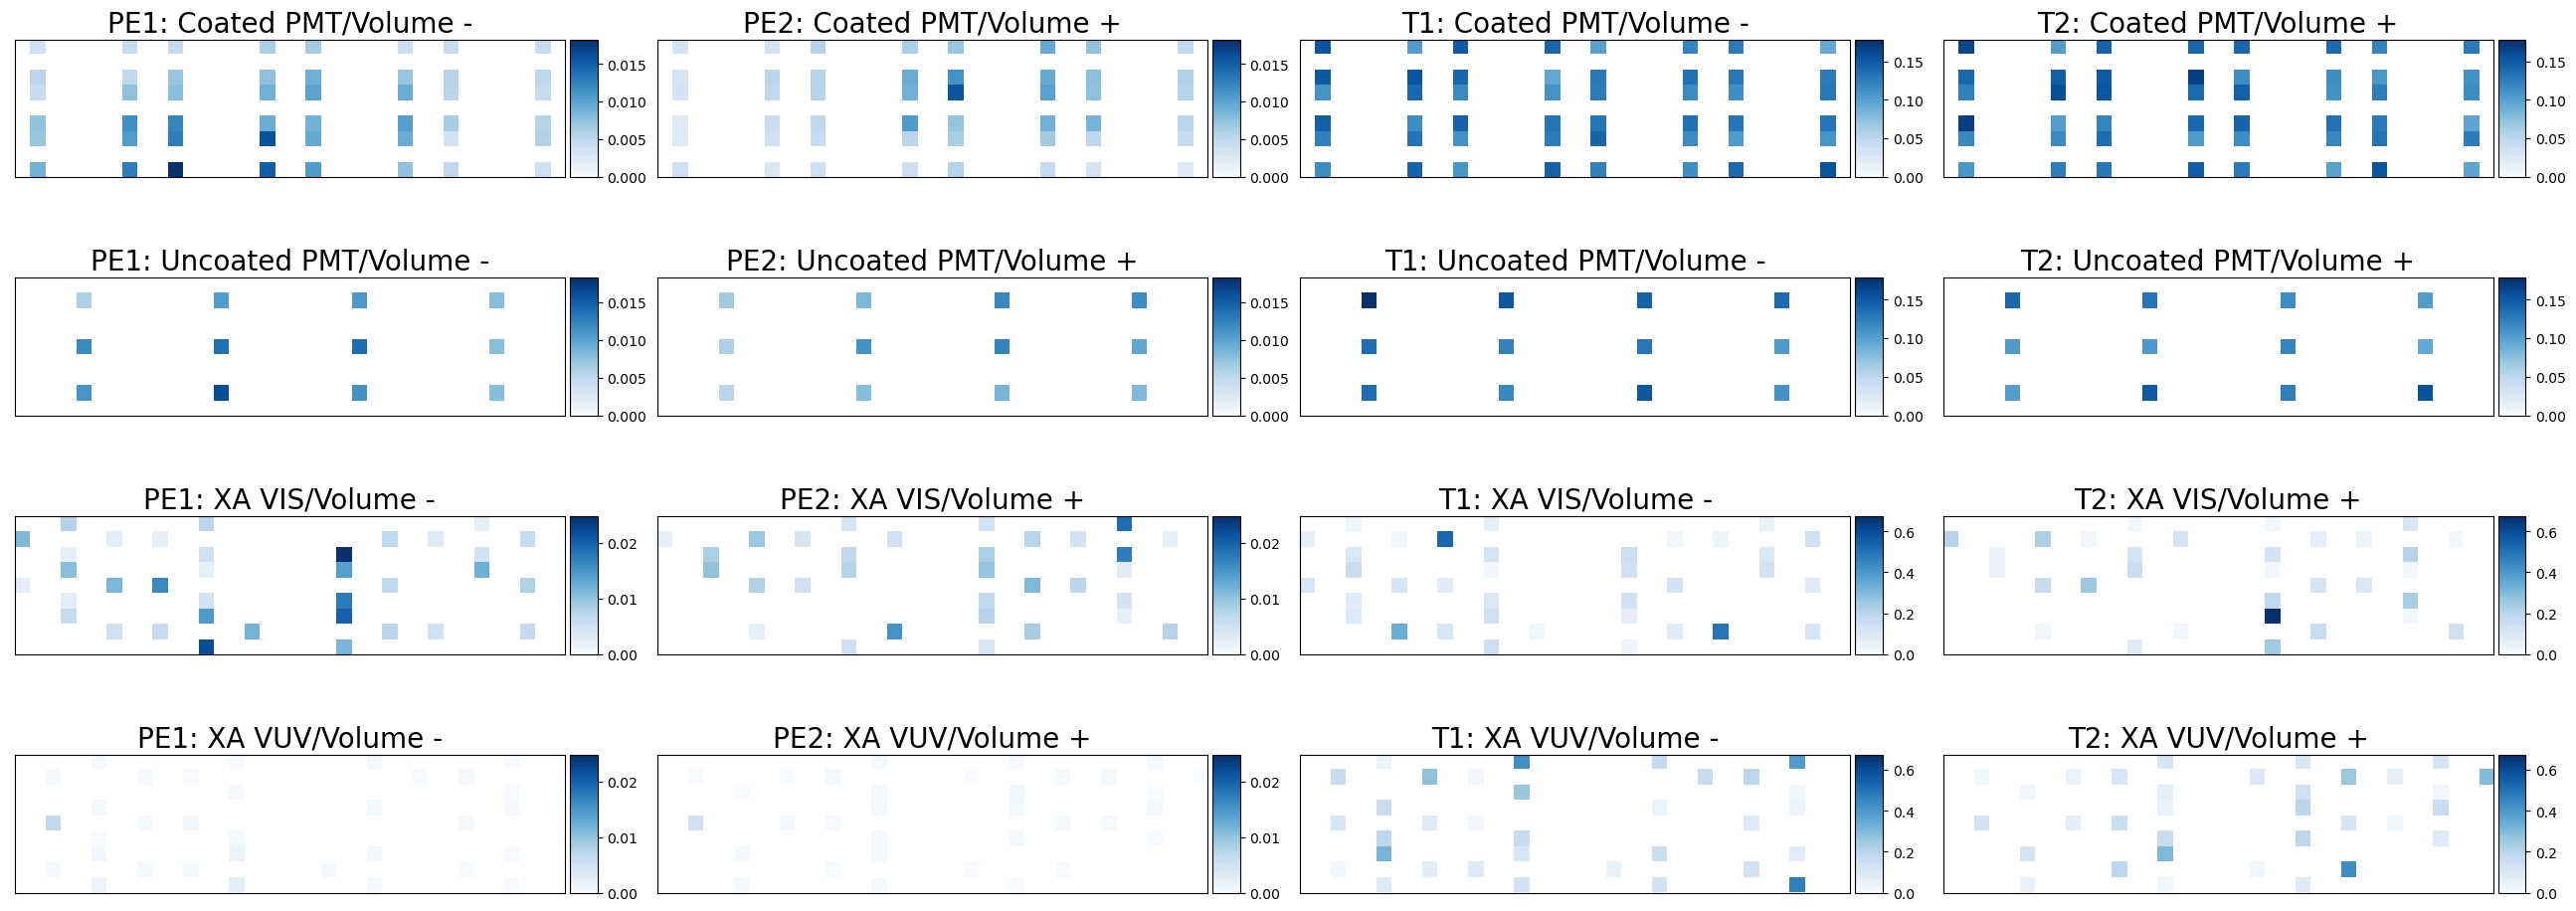

In [13]:
plot_image(image_compressed_4comp, event_idx, labels_4comp, groups_4comp, grid_4comp, figsize=(26, 10),show_colorbar=True)